In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data2014 = pd.read_csv("Output/2014dataset.csv",low_memory=False)
data2015 = pd.read_csv("Output/2015dataset.csv",low_memory=False)
data2016 = pd.read_csv("Output/2016dataset.csv",low_memory=False)

def getmm(group):
    if group == "i":
        return "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15"
    elif group == "sg":
        return "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15"
    else:
        return ""

In [3]:
# numerical enrollment by state

def numerical_enrollment(group, dataset, datasetlabel):
    if group == "i":
        print("Individual Group Numerical Enrollment (MM) Per State for " + str(datasetlabel))
    elif group == "sg":
        print("Small Group Numerical Enrollment (MM) Per State for " + str(datasetlabel))
    states = dataset["STATE"].drop_duplicates()
    mm = getmm(group)
    for state in states:
        temp = dataset.where(dataset["STATE"] == state).dropna(how='all')
        sum_mm = sum(temp[mm].convert_objects(convert_numeric=True).dropna())
        print(str(state) + " " + str(sum_mm))
        
numerical_enrollment("i", data2014, "2014 Benefit year")
numerical_enrollment("sg", data2014, "2014 Benefit year")
numerical_enrollment("i", data2015, "2015 Benefit year")
numerical_enrollment("sg", data2015, "2015 Benefit year")
numerical_enrollment("i", data2016, "2016 Benefit year")
numerical_enrollment("sg", data2016, "2016 Benefit year")


Individual Group Numerical Enrollment (MM) Per State for 2014 Benefit year
AK 258881.0
AL 2274722.0
AR 3121962.0
AZ 3197662.0
CA 22441576.0
CO 2999517.0
CT 1753345.0
DC 219258.0
DE 71296.0
FL 14772312.0
GA 5840120.0
HI 393292.0
IA 2380043.0
ID 1717449.0
IL 6607278.0
IN 2380005.0
KS 1835226.0
KY 1952471.0
LA 2577339.0
MA 1099283.0
MD 2409339.0
ME 602840.0
MI 4829585.0
MN 3489499.0
MO 3508667.0
MS 1318062.0
MT 788748.0
NC 7214133.0
ND 577004.0
NE 1497499.0
NH 651086.0
NJ 3088013.0
NM 807587.0
NV 1249146.0
NY 4869687.0
OH 4041647.0
OK 1799914.0
OR 2385714.0
PA 6811950.0
RI 436592.0
SC 2001572.0
SD 862251.0
TN 2965043.0
TX 13314269.0
UT 2436063.0
VA 4700249.0
WA 3728446.0
WI 2251479.0
WV 416072.0
WY 280337.0
Small Group Numerical Enrollment (MM) Per State for 2014 Benefit year
AK 343392.0
AL 3260189.0
AR 1536407.0
AZ 2265704.0
CA 19727003.0
CO 2645830.0
CT 2379163.0
DC 1086765.0
DE 146479.0
FL 8437500.0
GA 5178387.0
HI 1963378.0
IA 1823790.0
ID 951688.0
IL 6752382.0
IN 3587984.0
KS 2091102

In [4]:
# costs/premiums per member month by state

def costspremiumspmm(dataset, column_name, state, group, absval):
    if state == "ALL":
        temp = dataset
    else:
        temp = dataset.where(dataset["STATE"] == state).dropna(how='all')
    mm = getmm(group)
    sum_mm = sum(temp[mm].convert_objects(convert_numeric=True).dropna())
    if sum_mm == 0:
        return
    numerator = 0
    denominator = 0
    for index, row in temp.iterrows():
        if (pd.notnull(row[column_name])) and (pd.notnull(row[mm])):
            ratio = row[mm] / sum_mm
            denominator = denominator + ratio
            if absval == 1:
                numerator = numerator + (abs(row[column_name]) * ratio)
            else:
                numerator = numerator + (row[column_name]  * ratio)
    return numerator / denominator

temp2014 = data2014
temp2015 = data2015
temp2016 = data2016

temp2014["IndPremiumPMM"] = temp2014["1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15"] / temp2014["7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15"]
temp2014["IndCostsPMM"] = temp2014["2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15"] / temp2014["7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15"]
temp2014["IndPremiumMinusCostsPMM"] = temp2014["IndPremiumPMM"] - temp2014["IndCostsPMM"]
temp2015["IndPremiumPMM"] = temp2015["1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15"] / temp2015["7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15"]
temp2015["IndCostsPMM"] = temp2015["2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15"] / temp2015["7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15"]
temp2015["IndPremiumMinusCostsPMM"] = temp2015["IndPremiumPMM"] - temp2015["IndCostsPMM"]
temp2016["IndPremiumPMM"] = temp2016["1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15"] / temp2016["7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15"]
temp2016["IndCostsPMM"] = temp2016["2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15"] / temp2016["7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15"]
temp2016["IndPremiumMinusCostsPMM"] = temp2016["IndPremiumPMM"] - temp2016["IndCostsPMM"]

states = data2014["STATE"].drop_duplicates()

print("State,IndPremiumPMM14,IndCostsPMM14,IndPremiumMinusCostsPMM14,IndPremiumPMM15,IndCostsPMM15,IndPremiumMinusCostsPMM15,IndPremiumPMM16,IndCostsPMM16,IndPremiumMinusCostsPMM16")
for state in states:
    a= costspremiumspmm(temp2014, "IndPremiumPMM", state, "i", 0)
    b= costspremiumspmm(temp2014, "IndCostsPMM", state, "i", 0)
    c= costspremiumspmm(temp2014, "IndPremiumMinusCostsPMM", state, "i", 0)
    d= costspremiumspmm(temp2015, "IndPremiumPMM", state, "i", 0)
    e= costspremiumspmm(temp2015, "IndCostsPMM", state, "i", 0)
    f= costspremiumspmm(temp2015, "IndPremiumMinusCostsPMM", state, "i", 0)
    g= costspremiumspmm(temp2015, "IndPremiumPMM", state, "i", 0)
    h= costspremiumspmm(temp2015, "IndCostsPMM", state, "i", 0)
    i= costspremiumspmm(temp2015, "IndPremiumMinusCostsPMM", state, "i", 0)
    print(str(state)+","+str(a)+","+str(b)+","+str(c)+","+str(d)+","+str(e)+","+str(f)+","+str(g)+","+str(h)+","+str(i))



State,IndPremiumPMM14,IndCostsPMM14,IndPremiumMinusCostsPMM14,IndPremiumPMM15,IndCostsPMM15,IndPremiumMinusCostsPMM15,IndPremiumPMM16,IndCostsPMM16,IndPremiumMinusCostsPMM16
AK,428.549973501,567.622556387,-139.072582886,562.142640268,804.083307383,-241.940667115,562.142640268,804.083307383,-241.940667115
AL,287.730134953,317.151796334,-29.421661381,318.231321576,403.24761678,-85.0162952036,318.231321576,403.24761678,-85.0162952036
AR,295.016160712,318.532478961,-23.5163182483,315.145823791,379.339530139,-64.1937063471,315.145823791,379.339530139,-64.1937063471
AZ,251.631698751,307.093530494,-55.461831743,276.444266416,354.567448308,-78.1231818914,276.444266416,354.567448308,-78.1231818914
CA,362.528773124,325.802064388,36.726708736,374.231712004,359.73047963,14.5012323743,374.231712004,359.73047963,14.5012323743
CO,310.813709971,320.638805748,-9.82509577709,314.867143667,372.028066385,-57.1609227178,314.867143667,372.028066385,-57.1609227178
CT,376.516071726,347.792258926,28.7238127993

In [5]:
# degrees of market concentration by state (Herfindahl Index = square of % of market share)


def herf(group, dataset, datasetlabel):
    if group == "i":
        print("Individual Group Herfindal Indexes Per State for " + str(datasetlabel))
    elif group == "sg":
        print("Small Group Herfindal Indexes Per State for " + str(datasetlabel))
    states = dataset["STATE"].drop_duplicates()
    mm = getmm(group)
    for state in states:
        temp = dataset.where(dataset["STATE"] == state).dropna(how='all')
        sum_mm = sum(temp[mm].convert_objects(convert_numeric=True).dropna())
        herf = 0
        for index, row in temp.iterrows():
            if (pd.notnull(row[mm])):
                ratio = row[mm] / sum_mm
                herf = herf + (ratio * 100)**2
        print(str(state) + " " + str(herf))
        
herf("i", data2014, "2014 Benefit year")
herf("sg", data2014, "2014 Benefit year")
herf("i", data2015, "2015 Benefit year")
herf("sg", data2015, "2015 Benefit year")
herf("i", data2016, "2016 Benefit year")
herf("sg", data2016, "2016 Benefit year")

Individual Group Herfindal Indexes Per State for 2014 Benefit year
AK 4218.20013818
AL 9279.57221458
AR 6954.1149267
AZ 3197.41862932
CA 2394.58048799
CO 1702.53363825
CT 2671.7458488
DC 3445.45497639
DE 3530.06139449
FL 2138.42389924
GA 2958.27767423
HI 5015.76504651
IA 5299.69132154
ID 4293.43082393
IL 7073.81012573
IN 5089.45407636
KS 2734.18664526
KY 3859.90625812
LA 4174.8057671
MA 2031.45263581
MD 3319.43986837
ME 5249.41535639
MI 2540.26941541
MN 3520.31946072
MO 2881.56592253
MS 4340.49839645
MT 3808.66834162
NC 7639.30771559
ND 7197.15648895
NE 4899.85437614
NH 4705.17232339
NJ 3885.04147805
NM 4400.90905257
NV 1555.58194128
NY 945.104202191
OH 2284.09691704
OK 7264.14680805
OR 2937.11925261
PA 2043.29429703
RI 8989.30167434
SC 3035.7812645
SD 5180.50743164
TN 7305.66699598
TX 5456.81673867
UT 2878.87150963
VA 2430.4004813
WA 1756.44290026
WI 1109.01971424
WV 8157.6052291
WY 3430.4981383
Small Group Herfindal Indexes Per State for 2014 Benefit year
AK 4454.19272393
AL 9473.343

In [6]:
#tograph1 = pd.read_csv("Output/numericalenrollment.csv")
#tograph2 = pd.read_csv("Output/costspremiumspmm.csv")
#tograph3 = pd.read_csv("Output/herfindahlindex.csv")

#a = list(tograph1.columns.values)
#b = list(tograph2.columns.values)
#c = list(tograph3.columns.values)

#print(a)
#print(b)
#print(c)

In [7]:
import matplotlib.pyplot as plt

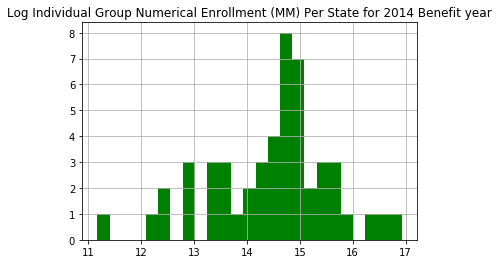

In [18]:
plt.hist(np.log(tograph1["Individual Group Numerical Enrollment (MM) Per State for 2014 Benefit year"]), 25, facecolor='g')
plt.title('Log Individual Group Numerical Enrollment (MM) Per State for 2014 Benefit year')
plt.grid(True)
plt.show()

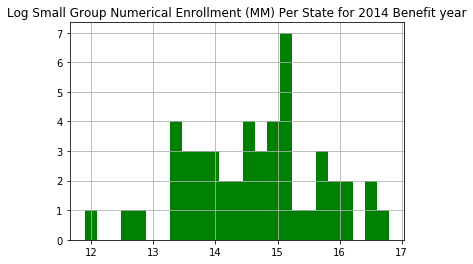

In [19]:
plt.hist(np.log(tograph1["Small Group Numerical Enrollment (MM) Per State for 2014 Benefit year"]), 25, facecolor='g')
plt.title('Log Small Group Numerical Enrollment (MM) Per State for 2014 Benefit year')
plt.grid(True)
plt.show()

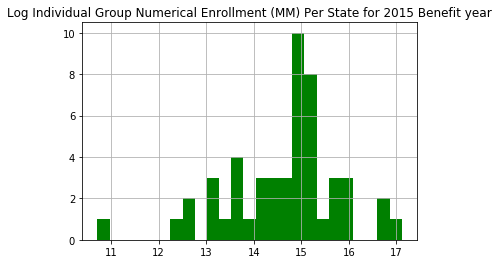

In [20]:
plt.hist(np.log(tograph1["Individual Group Numerical Enrollment (MM) Per State for 2015 Benefit year"]), 25, facecolor='g')
plt.title('Log Individual Group Numerical Enrollment (MM) Per State for 2015 Benefit year')
plt.grid(True)
plt.show()

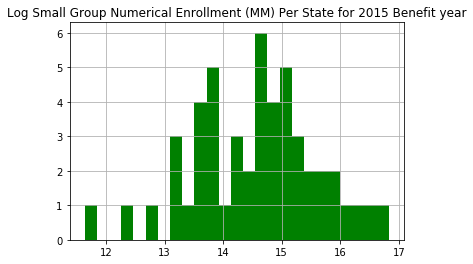

In [21]:
plt.hist(np.log(tograph1["Small Group Numerical Enrollment (MM) Per State for 2015 Benefit year"]), 25, facecolor='g')
plt.title('Log Small Group Numerical Enrollment (MM) Per State for 2015 Benefit year')
plt.grid(True)
plt.show()

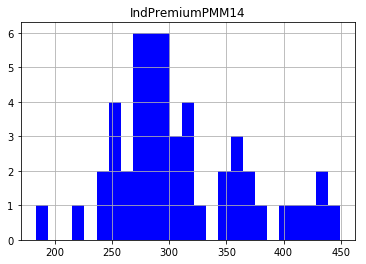

In [22]:
plt.hist(tograph2["IndPremiumPMM14"], 25, facecolor='b')
plt.title('IndPremiumPMM14')
plt.grid(True)
plt.show()

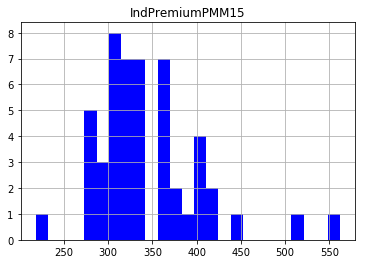

In [25]:
plt.hist(tograph2["IndPremiumPMM15"], 25, facecolor='b')
plt.title('IndPremiumPMM15')
plt.grid(True)
plt.show()

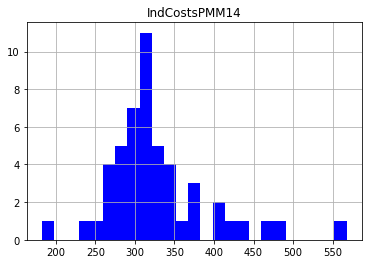

In [23]:
plt.hist(tograph2["IndCostsPMM14"], 25, facecolor='b')
plt.title('IndCostsPMM14')
plt.grid(True)
plt.show()

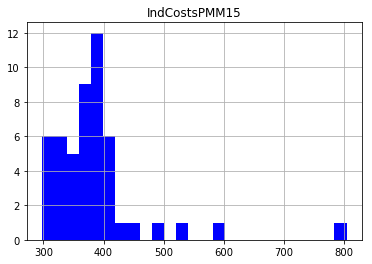

In [26]:
plt.hist(tograph2["IndCostsPMM15"], 25, facecolor='b')
plt.title('IndCostsPMM15')
plt.grid(True)
plt.show()

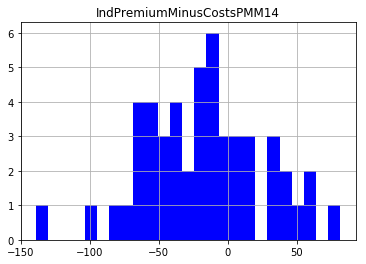

In [24]:
plt.hist(tograph2["IndPremiumMinusCostsPMM14"], 25, facecolor='b')
plt.title('IndPremiumMinusCostsPMM14')
plt.grid(True)
plt.show()

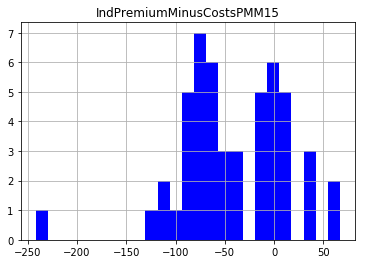

In [27]:
plt.hist(tograph2["IndPremiumMinusCostsPMM15"], 25, facecolor='b')
plt.title('IndPremiumMinusCostsPMM15')
plt.grid(True)
plt.show()

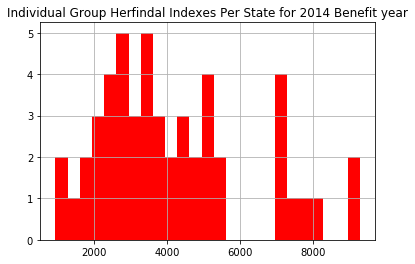

In [28]:
plt.hist(tograph3["Individual Group Herfindal Indexes Per State for 2014 Benefit year"], 25, facecolor='r')
plt.title('Individual Group Herfindal Indexes Per State for 2014 Benefit year')
plt.grid(True)
plt.show()

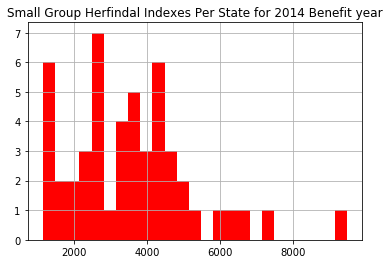

In [29]:
plt.hist(tograph3["Small Group Herfindal Indexes Per State for 2014 Benefit year"], 25, facecolor='r')
plt.title('Small Group Herfindal Indexes Per State for 2014 Benefit year')
plt.grid(True)
plt.show()

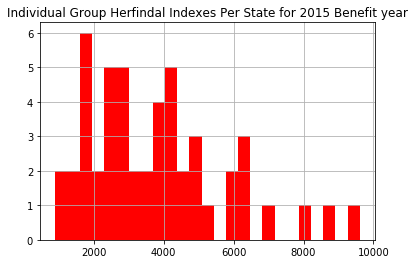

In [30]:
plt.hist(tograph3["Individual Group Herfindal Indexes Per State for 2015 Benefit year"], 25, facecolor='r')
plt.title('Individual Group Herfindal Indexes Per State for 2015 Benefit year')
plt.grid(True)
plt.show()

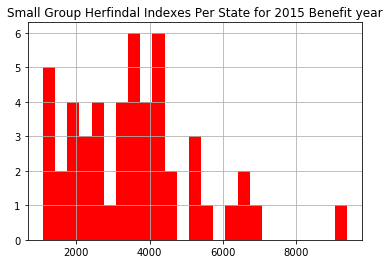

In [31]:
plt.hist(tograph3["Small Group Herfindal Indexes Per State for 2015 Benefit year"], 25, facecolor='r')
plt.title('Small Group Herfindal Indexes Per State for 2015 Benefit year')
plt.grid(True)
plt.show()